In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
"""%matplotlib inline turns on “inline plotting”, where plot graphics will appear in your notebook. ... 
If you are not using matplotlib in interactive mode at all, figures will only appear if you invoke plt."""

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [2]:
#df = DataFrame
#Read csv file
df = pd.read_csv("/Users/prasad/Desktop/projects/diabetes_prediction_with_knn-master/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#mathematical details about data 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#here we can see all the info regarding no. of colums and missin values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#features
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
#total number of rows and columns
df.shape

(768, 9)

In [7]:
#make sure there is no missing values in our data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#checking the value of Outcome colums
#there is data imbalance
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
#data preprocessing

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


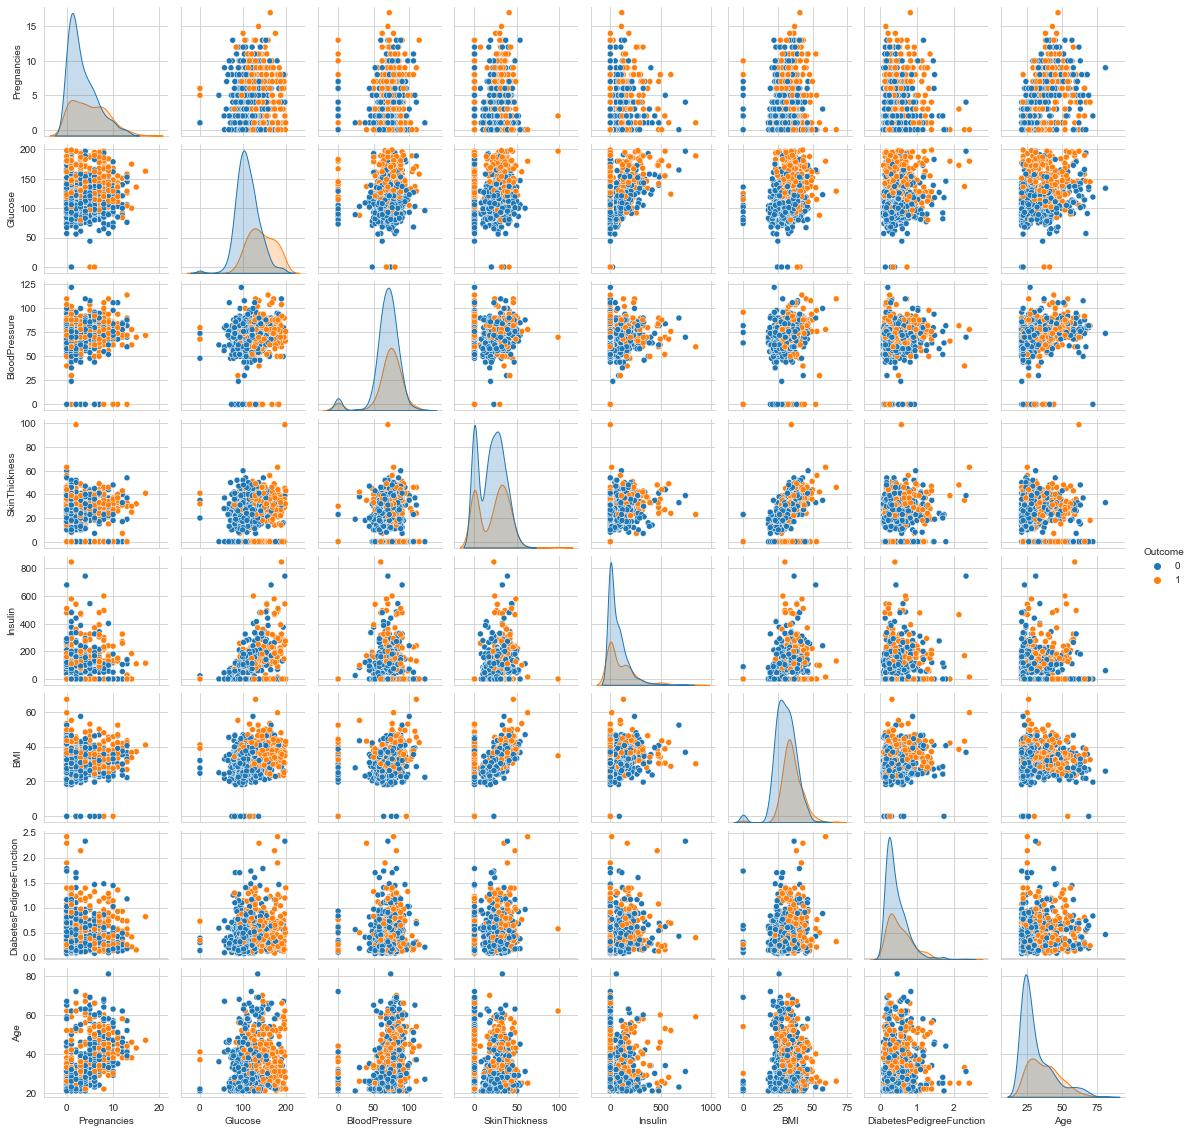

In [10]:
#pairplot 
sns.set_style("whitegrid");
sns.pairplot(df, hue="Outcome", size=2);


from above pairplot we can say that  Graph(Age-Glucose) 
graph(DiabetesPedigreeFunction - Glucose)graph(BMI - Glucose) graph (SkinThickness -Glucose) Outcome faily seperated 
these parameters are important for further analysis

using bar plot see the relation between all the column with target column Outcome.

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

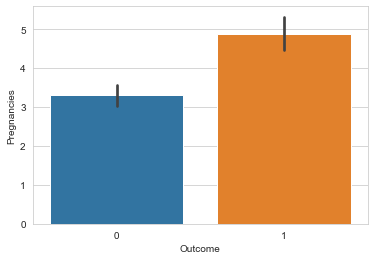

In [11]:
sns.barplot(x = 'Outcome', y = 'Pregnancies', data = df)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

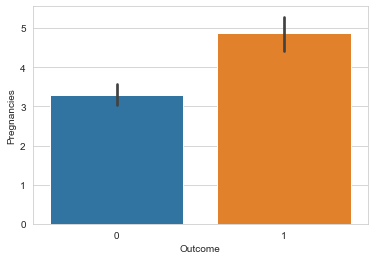

In [12]:
sns.barplot(x = 'Outcome', y = 'Pregnancies', data = df)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

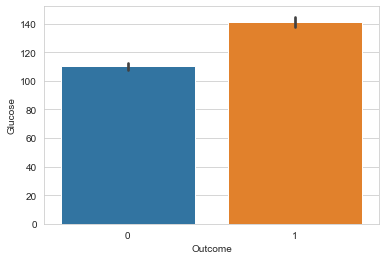

In [13]:
sns.barplot(x = 'Outcome', y = 'Glucose', data = df)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

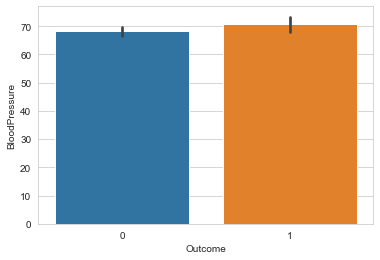

In [14]:
sns.barplot(x = 'Outcome', y = 'BloodPressure', data = df)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

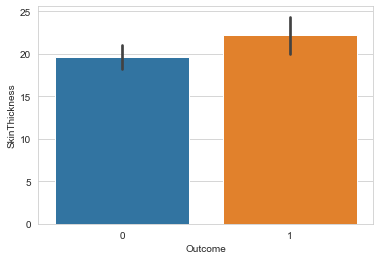

In [15]:
sns.barplot(x = 'Outcome', y = 'SkinThickness', data = df)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

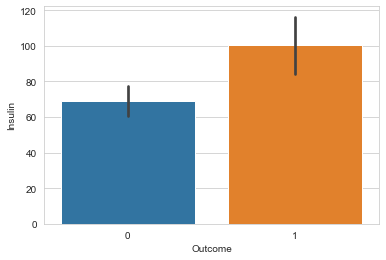

In [16]:
sns.barplot(x = 'Outcome', y = 'Insulin', data = df)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

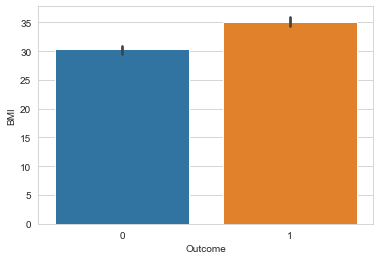

In [17]:
sns.barplot(x = 'Outcome', y = 'BMI', data = df)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

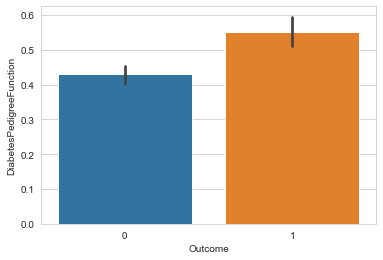

In [18]:
sns.barplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

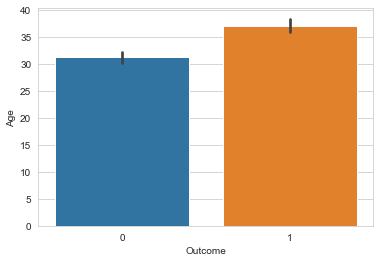

In [19]:
sns.barplot(x = 'Outcome', y = 'Age', data = df)

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


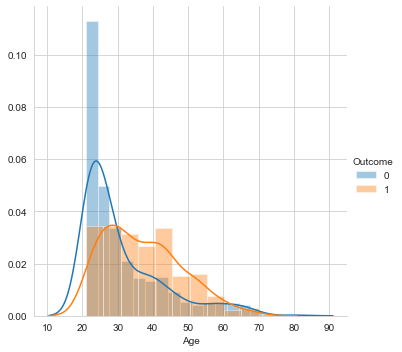

In [20]:
#histogram
sns.FacetGrid(df, hue="Outcome", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();



/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


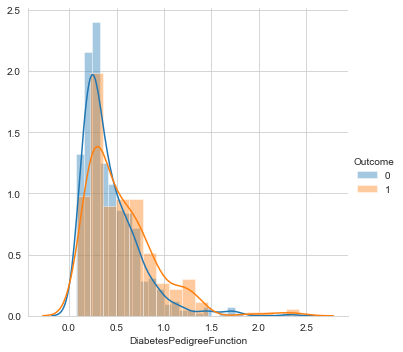

In [21]:
sns.FacetGrid(df, hue="Outcome", size=5) \
   .map(sns.distplot, "DiabetesPedigreeFunction") \
   .add_legend();


/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


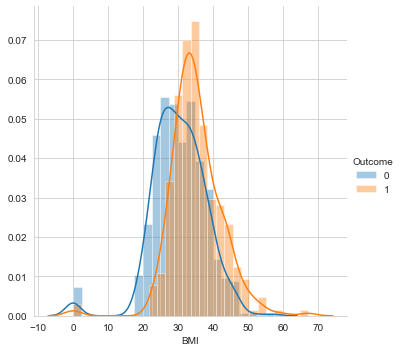

In [22]:
sns.FacetGrid(df, hue="Outcome", size=5) \
   .map(sns.distplot, "BMI") \
   .add_legend();

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


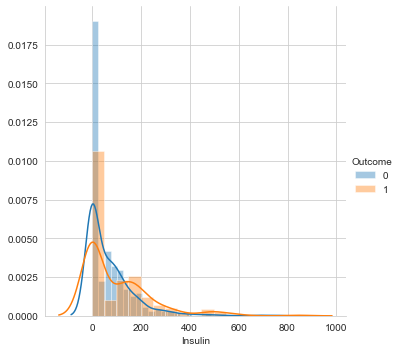

In [23]:
sns.FacetGrid(df, hue="Outcome", size=5) \
   .map(sns.distplot, "Insulin") \
   .add_legend();

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


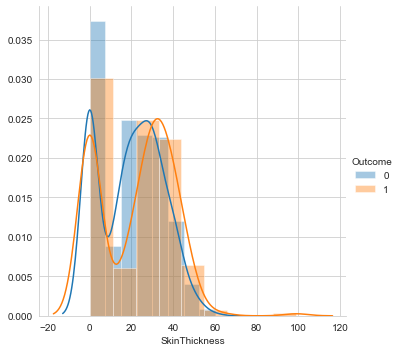

In [24]:
sns.FacetGrid(df, hue="Outcome", size=5) \
   .map(sns.distplot, "SkinThickness") \
   .add_legend();

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


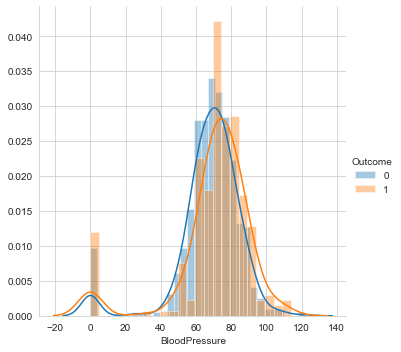

In [25]:
sns.FacetGrid(df, hue="Outcome", size=5) \
   .map(sns.distplot, "BloodPressure") \
   .add_legend();

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


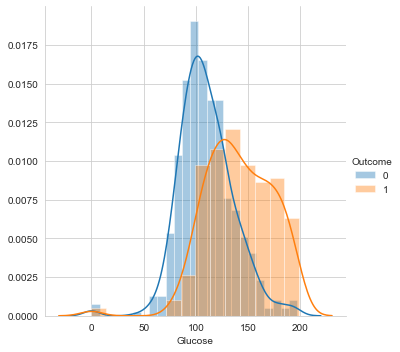

In [26]:
sns.FacetGrid(df, hue="Outcome", size=5) \
   .map(sns.distplot, "Glucose") \
   .add_legend();

/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


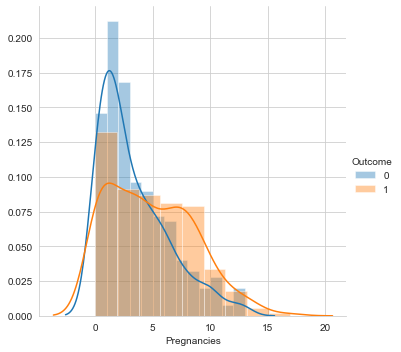

In [27]:
sns.FacetGrid(df, hue="Outcome", size=5) \
   .map(sns.distplot, "Pregnancies") \
   .add_legend();

<AxesSubplot:>

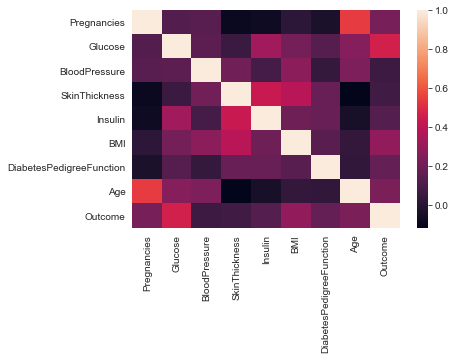

In [28]:
#using heatmap see the relationship of data
sns.heatmap(df.corr())

with the help of colors we can say that ["Glucose","BMI","Age"] have more weightage as compare to others.

<AxesSubplot:xlabel='Age', ylabel='count'>

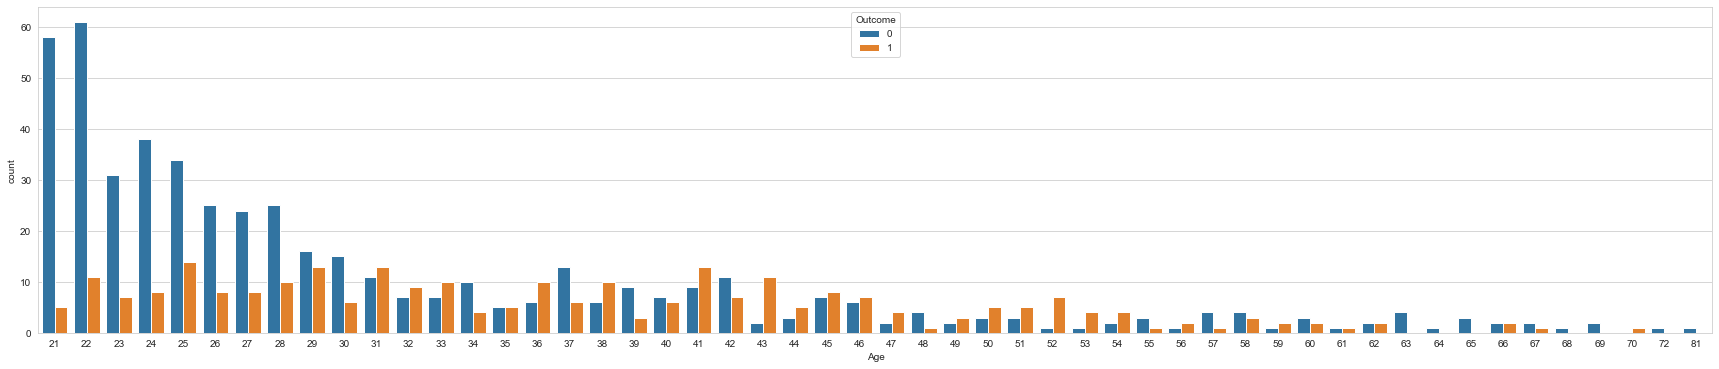

In [29]:

fig = plt.figure(figsize = (30,6))
sns.countplot(x='Age',data=df,hue="Outcome")

model selection 

In [30]:
x = df.drop('Outcome' , axis = 1)

In [31]:
x.shape

(768, 8)

In [32]:
y = df['Outcome']

In [33]:
y.shape

(768,)

In [34]:
ss = StandardScaler()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 16)

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
           

pred = knn.predict(x_test)


In [38]:
print(confusion_matrix(y_test,pred))

[[94 31]
 [28 39]]


Text(0, 0.5, 'Error Rate')

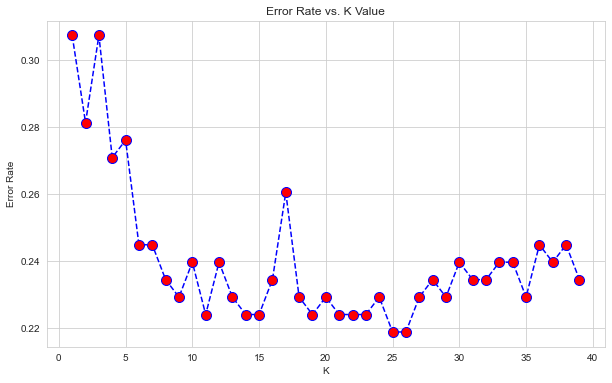

In [39]:
from matplotlib.figure import Figure
#Choosing a K Value

#Let's go ahead and use the elbow method to pick a good K Value:

error_rate = []


# Will take some time

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')

In [40]:
# from the above Graph we will select k value which has lower error rate.
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))


#WITH K=25


WITH K=25


[[114  11]
 [ 31  36]]


In [41]:
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test,pred))


#WITH K=26


WITH K=26


[[116   9]
 [ 33  34]]


here we can see that TP = 116 || TN = 34

In [42]:
print(f1_score(y_test,pred))


0.6181818181818182


In [43]:
print(accuracy_score(y_test,pred))

0.78125


  Conclusion : for diabetes data knn give us 78% accuracy.